In [1]:
import numpy as np 
import _pickle as cPickle
import gzip
import os
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
# utility functions

def one_hot_encoded(y, num_class):
    n = y.shape[0]
    onehot = np.zeros((n, num_class), dtype="int32")
    for i in range(n):
        idx = y[i]
        onehot[i][idx] = 1
    return onehot


def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)  # both are not one hot encoded


def softmax(x):
    # YOUR CODE HERE
    
# l2 regularization
def l2_reg(layers, lam=0.001):
    reg_loss = 0.0
    for layer in layers:
        if hasattr(layer, 'W'):
            reg_loss += 0.5 * lam * np.sum(layer.W * layer.W)
    return reg_loss


# l2 regularization grad
def delta_l2_reg(layers, grads, lam=0.001):
    for layer, grad in zip(layers, reversed(grads)):
        if hasattr(layer, 'W'):
            grad[0] += lam * layer.W
    return grads


In [20]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

In [3]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X, mode):
        # YOUR CODE HERE
        pass
    
    def backward(self, dout, mode):
        # YOUR CODE HERE
        pass

In [5]:
points = np.linspace(-1, 1, 10*12).reshape([10, 12])
relu = ReLU()
f = lambda x: relu.forward(x, mode='train').sum(axis=1).sum()
res = f(points)
numeric_grads = eval_numerical_gradient(f, points)
print(numeric_grads)
inp_grad = np.ones(shape=(10, 12))
grads = relu.backward(inp_grad, mode='train')[0]
assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [6]:
class Linear():

    def __init__(self, in_size, out_size):

        # Xavier init
        self.W = np.random.randn(in_size, out_size) / np.sqrt(in_size + out_size/ 2.)
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None

    def forward(self, X, mode):
        # YOUR CODE HERE
        pass
    
    def backward(self, dout, mode):
        # YOUR CODE HERE
        pass

In [7]:
points = np.linspace(-1, 1, 10*12).reshape([10, 12])
relu = Linear(12, 5)
f = lambda x: relu.forward(x, mode='train').sum(axis=1).sum()
res = f(points)
numeric_grads = eval_numerical_gradient(f, points)
print(numeric_grads)
inp_grad = np.ones(shape=(10, 5))
grads = relu.backward(inp_grad, mode='train')[0]
assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

[[ 0.70434511 -0.42519508 -0.695472   -0.76625294  0.21195665 -0.82354702
  -0.05577046 -0.48575534  0.04644955 -0.24100405  0.28731923 -0.85151743]
 [ 0.70434511 -0.42519508 -0.695472   -0.76625294  0.21195665 -0.82354702
  -0.05577046 -0.48575534  0.04644955 -0.24100405  0.28731923 -0.85151743]
 [ 0.70434511 -0.42519508 -0.695472   -0.76625294  0.21195665 -0.82354702
  -0.05577046 -0.48575534  0.04644955 -0.24100405  0.28731923 -0.85151743]
 [ 0.70434511 -0.42519508 -0.695472   -0.76625294  0.21195665 -0.82354702
  -0.05577046 -0.48575534  0.04644955 -0.24100405  0.28731923 -0.85151743]
 [ 0.70434511 -0.42519508 -0.695472   -0.76625294  0.21195665 -0.82354702
  -0.05577046 -0.48575534  0.04644955 -0.24100405  0.28731923 -0.85151743]
 [ 0.70434511 -0.42519508 -0.695472   -0.76625294  0.21195665 -0.82354702
  -0.05577046 -0.48575534  0.04644955 -0.24100405  0.28731923 -0.85151743]
 [ 0.70434511 -0.42519508 -0.695472   -0.76625294  0.21195665 -0.82354702
  -0.05577046 -0.48575534  0.046

In [8]:
class CrossEntropyLoss(object):

    def forward(self, X, y):
        # YOUR CODE HERE
        pass
    
    def backward(self, X, y):
        # YOUR CODE HERE
        pass

## NN implementation

In [9]:
class NN:

    def __init__(self, loss_func=CrossEntropyLoss(), mode = 'train'):
    
        self.layers = []
        self.params = []
        self.loss_func = loss_func
        self.grads = []
        self.mode = mode

    def add_layer(self,layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X, self.mode)
        return X

    def backward(self, dout):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            dout, grad = layer.backward(dout, self.mode)
            self.grads.append(grad)
        return self.grads

    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        dout = self.loss_func.backward(out,y)
        loss += l2_reg(self.layers)
        grads = self.backward(dout)
        grads = delta_l2_reg(self.layers, grads)
        return loss, grads

    def predict(self, X):
        X = self.forward(X)
        return np.argmax(softmax(X), axis=1)


    def dispGradParam():
        print(self.grads)
    

    def clear_grad_param(self):
        self.grads = []

In [10]:
# SGD with momentum
def update(velocity, params, grads, learning_rate=0.001, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] + learning_rate * g[i]
            p[i] -= v[i]


# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    X, y = shuffle(X, y)

    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, ...]
        y_batch = y[i:i + minibatch_size, ...]

        minibatches.append((X_batch, y_batch))
    return minibatches


In [11]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9,
                 verbose=True, X_val=None, y_val=None, nesterov=True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    c = 0 
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        if verbose:
            print("Epoch {0}".format(i + 1))

        # iterate over mini batches
        for X_mini, y_mini in tqdm(minibatches):

            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads,
                            learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in tqdm(minibatches_val):
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)


        # accuracy of model at end of epoch after all mini batch updates   

        if verbose:
            m_train = X_train.shape[0]
            m_val = X_val.shape[0]
            y_train_pred = np.array([], dtype="int64")
            y_val_pred = np.array([], dtype="int64")

            for i in range(0, m_train, minibatch_size):
                X_tr = X_train[i:i + minibatch_size, : ]
                y_tr = y_train[i:i + minibatch_size, ]
                y_train_pred = np.append(y_train_pred, net.predict(X_tr))

            for i in range(0, m_val, minibatch_size):
                X_va = X_val[i:i + minibatch_size, : ]
                y_va = y_val[i:i + minibatch_size, ]
                y_val_pred = np.append(y_val_pred, net.predict(X_va))

            train_acc = check_accuracy(y_train, y_train_pred)
            val_acc = check_accuracy(y_val, y_val_pred)

            mean_train_loss = sum(loss_batch) / float(len(loss_batch))
            mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))


            # early stopping with patience = 5 on val loss

            if len(val_loss_epoch) == 0:
                val_loss_epoch.append(mean_val_loss)
            else:
                for j in val_loss_epoch[-5:]:
                    if mean_val_loss > j:
                        c += 1
                    else:
                        c = 0
                if c > 5:
                    print('Early stopping')
                    return net
                else:
                    c = 0
                    val_loss_epoch.append(mean_val_loss)    


            print("Loss = {0} | Training Accuracy = {1} | Val Loss = {2} | Val Accuracy = {3}".format(
                mean_train_loss, train_acc, mean_val_loss, val_acc))
    return net


In [12]:

# Get preprocessed training and validation data

X_train = np.array([
    [1, 2, 1, 2],
    [2, 4, 2, 4],
    [2, 1, 2, 1],
    [4, 2, 4, 2],
])

y_train = np.array([0, 1, 0, 1])
X_val = X_train.copy()
y_val = y_train.copy()

print(X_train.shape)
print(X_val.shape)


# define neural net
model = NN()

# add some layers
# YOUR CODE HERE

model = train(model, X_train , y_train, minibatch_size=4, epoch=100,
           learning_rate=0.1, X_val=X_val, y_val=y_val)




  0%|          | 0/1 [00:00<?, ?it/s]

(4, 4)
(4, 4)
Epoch 1
Loss = 0.724200893189629 | Training Accuracy = 0.5 | Val Loss = 0.6829919136500852 | Val Accuracy = 0.5
Epoch 2
Loss = 0.6829919136500852 | Training Accuracy = 0.5 | Val Loss = 0.6758716752809825 | Val Accuracy = 0.5
Epoch 3
Loss = 0.6758716752809825 | Training Accuracy = 0.5 | Val Loss = 0.6691250755881628 | Val Accuracy = 0.5
Epoch 4
Loss = 0.6691250755881628 | Training Accuracy = 0.5 | Val Loss = 0.6625058244062286 | Val Accuracy = 0.5
Epoch 5
Loss = 0.6625058244062286 | Training Accuracy = 0.5 | Val Loss = 0.6559915498854484 | Val Accuracy = 0.5
Epoch 6


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.6559915498854484 | Training Accuracy = 0.5 | Val Loss = 0.6495617550333412 | Val Accuracy = 0.5
Epoch 7
Loss = 0.6495617550333412 | Training Accuracy = 0.5 | Val Loss = 0.6432008527507389 | Val Accuracy = 0.5
Epoch 8
Loss = 0.6432008527507389 | Training Accuracy = 0.5 | Val Loss = 0.6368986376570035 | Val Accuracy = 0.5
Epoch 9
Loss = 0.6368986376570035 | Training Accuracy = 0.5 | Val Loss = 0.6306433333438293 | Val Accuracy = 0.5
Epoch 10
Loss = 0.6306433333438293 | Training Accuracy = 0.5 | Val Loss = 0.6244214980681908 | Val Accuracy = 0.5
Epoch 11
Loss = 0.6244214980681908 | Training Accuracy = 0.5 | Val Loss = 0.6182323264220194 | Val Accuracy = 0.5
Epoch 12


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.6182323264220194 | Training Accuracy = 0.5 | Val Loss = 0.6120760654423117 | Val Accuracy = 0.5
Epoch 13
Loss = 0.6120760654423117 | Training Accuracy = 0.5 | Val Loss = 0.6059354869662213 | Val Accuracy = 0.5
Epoch 14
Loss = 0.6059354869662213 | Training Accuracy = 0.5 | Val Loss = 0.5998101111204749 | Val Accuracy = 0.5
Epoch 15
Loss = 0.5998101111204749 | Training Accuracy = 0.5 | Val Loss = 0.5936963438275555 | Val Accuracy = 0.5
Epoch 16
Loss = 0.5936963438275555 | Training Accuracy = 0.5 | Val Loss = 0.5875924642251613 | Val Accuracy = 0.5
Epoch 17
Loss = 0.5875924642251613 | Training Accuracy = 0.5 | Val Loss = 0.5814954698422659 | Val Accuracy = 0.5
Epoch 18
Loss = 0.5814954698422659 | Training Accuracy = 0.5 | Val Loss = 0.5754026953592033 | Val Accuracy = 0.5
Epoch 19


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.5754026953592033 | Training Accuracy = 0.5 | Val Loss = 0.5693054084240822 | Val Accuracy = 0.5
Epoch 20
Loss = 0.5693054084240822 | Training Accuracy = 0.5 | Val Loss = 0.5628546934448934 | Val Accuracy = 0.5
Epoch 21
Loss = 0.5628546934448934 | Training Accuracy = 0.5 | Val Loss = 0.5566946871394505 | Val Accuracy = 0.5
Epoch 22
Loss = 0.5566946871394505 | Training Accuracy = 0.5 | Val Loss = 0.5505402233988979 | Val Accuracy = 0.5
Epoch 23


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.5505402233988979 | Training Accuracy = 0.5 | Val Loss = 0.5443869226660567 | Val Accuracy = 0.5
Epoch 24
Loss = 0.5443869226660567 | Training Accuracy = 0.5 | Val Loss = 0.5382314355645303 | Val Accuracy = 0.5
Epoch 25
Loss = 0.5382314355645303 | Training Accuracy = 1.0 | Val Loss = 0.5320613284105341 | Val Accuracy = 1.0
Epoch 26
Loss = 0.5320613284105341 | Training Accuracy = 1.0 | Val Loss = 0.5258850395853771 | Val Accuracy = 1.0
Epoch 27
Loss = 0.5258850395853771 | Training Accuracy = 1.0 | Val Loss = 0.519700533324249 | Val Accuracy = 1.0
Epoch 28
Loss = 0.519700533324249 | Training Accuracy = 1.0 | Val Loss = 0.5135071901222578 | Val Accuracy = 1.0
Epoch 29
Loss = 0.5135071901222578 | Training Accuracy = 1.0 | Val Loss = 0.5073077914133896 | Val Accuracy = 1.0
Epoch 30


100%|██████████| 1/1 [00:00<00:00, 363.52it/s]


Loss = 0.5073077914133896 | Training Accuracy = 1.0 | Val Loss = 0.5010954315961428 | Val Accuracy = 1.0
Epoch 31
Loss = 0.5010954315961428 | Training Accuracy = 1.0 | Val Loss = 0.4948711916831694 | Val Accuracy = 1.0
Epoch 32
Loss = 0.4948711916831694 | Training Accuracy = 1.0 | Val Loss = 0.48862637995381974 | Val Accuracy = 1.0
Epoch 33
Loss = 0.48862637995381974 | Training Accuracy = 1.0 | Val Loss = 0.4819673782844064 | Val Accuracy = 1.0
Epoch 34
Loss = 0.4819673782844064 | Training Accuracy = 1.0 | Val Loss = 0.47567494337580535 | Val Accuracy = 1.0
Epoch 35


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.47567494337580535 | Training Accuracy = 1.0 | Val Loss = 0.46936827257652575 | Val Accuracy = 1.0
Epoch 36
Loss = 0.46936827257652575 | Training Accuracy = 1.0 | Val Loss = 0.46306220562635597 | Val Accuracy = 1.0
Epoch 37
Loss = 0.46306220562635597 | Training Accuracy = 1.0 | Val Loss = 0.4567478705520712 | Val Accuracy = 1.0
Epoch 38
Loss = 0.4567478705520712 | Training Accuracy = 1.0 | Val Loss = 0.4504258832805706 | Val Accuracy = 1.0
Epoch 39


100%|██████████| 1/1 [00:00<00:00, 353.12it/s]

Loss = 0.4504258832805706 | Training Accuracy = 1.0 | Val Loss = 0.4440972523718182 | Val Accuracy = 1.0
Epoch 40
Loss = 0.4440972523718182 | Training Accuracy = 1.0 | Val Loss = 0.43777576769743454 | Val Accuracy = 1.0
Epoch 41
Loss = 0.43777576769743454 | Training Accuracy = 1.0 | Val Loss = 0.43150683265989165 | Val Accuracy = 1.0
Epoch 42



100%|██████████| 1/1 [00:00<00:00, 460.86it/s]

Loss = 0.43150683265989165 | Training Accuracy = 1.0 | Val Loss = 0.42514181033850296 | Val Accuracy = 1.0
Epoch 43
Loss = 0.42514181033850296 | Training Accuracy = 1.0 | Val Loss = 0.41857450840207316 | Val Accuracy = 1.0
Epoch 44
Loss = 0.41857450840207316 | Training Accuracy = 1.0 | Val Loss = 0.41206912663863154 | Val Accuracy = 1.0
Epoch 45
Loss = 0.41206912663863154 | Training Accuracy = 1.0 | Val Loss = 0.40523381413590454 | Val Accuracy = 1.0
Epoch 46
Loss = 0.40523381413590454 | Training Accuracy = 1.0 | Val Loss = 0.3987187882827178 | Val Accuracy = 1.0
Epoch 47
Loss = 0.3987187882827178 | Training Accuracy = 1.0 | Val Loss = 0.3923202837647213 | Val Accuracy = 1.0
Epoch 48



  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.3923202837647213 | Training Accuracy = 1.0 | Val Loss = 0.385934042615421 | Val Accuracy = 1.0
Epoch 49
Loss = 0.385934042615421 | Training Accuracy = 1.0 | Val Loss = 0.37958245058663653 | Val Accuracy = 1.0
Epoch 50
Loss = 0.37958245058663653 | Training Accuracy = 1.0 | Val Loss = 0.3732394551942975 | Val Accuracy = 1.0
Epoch 51
Loss = 0.3732394551942975 | Training Accuracy = 1.0 | Val Loss = 0.3669006983233129 | Val Accuracy = 1.0
Epoch 52
Loss = 0.3669006983233129 | Training Accuracy = 1.0 | Val Loss = 0.36058846688226776 | Val Accuracy = 1.0
Epoch 53


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.36058846688226776 | Training Accuracy = 1.0 | Val Loss = 0.35430335863740015 | Val Accuracy = 1.0
Epoch 54
Loss = 0.35430335863740015 | Training Accuracy = 1.0 | Val Loss = 0.3480479499249334 | Val Accuracy = 1.0
Epoch 55
Loss = 0.3480479499249334 | Training Accuracy = 1.0 | Val Loss = 0.34182534442023094 | Val Accuracy = 1.0
Epoch 56
Loss = 0.34182534442023094 | Training Accuracy = 1.0 | Val Loss = 0.33563969531670945 | Val Accuracy = 1.0
Epoch 57
Loss = 0.33563969531670945 | Training Accuracy = 1.0 | Val Loss = 0.32949495334140144 | Val Accuracy = 1.0
Epoch 58
Loss = 0.32949495334140144 | Training Accuracy = 1.0 | Val Loss = 0.32338924138977265 | Val Accuracy = 1.0
Epoch 59


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.32338924138977265 | Training Accuracy = 1.0 | Val Loss = 0.3173442898932348 | Val Accuracy = 1.0
Epoch 60
Loss = 0.3173442898932348 | Training Accuracy = 1.0 | Val Loss = 0.31133916109752224 | Val Accuracy = 1.0
Epoch 61
Loss = 0.31133916109752224 | Training Accuracy = 1.0 | Val Loss = 0.30538331846944167 | Val Accuracy = 1.0
Epoch 62
Loss = 0.30538331846944167 | Training Accuracy = 1.0 | Val Loss = 0.29948510228168873 | Val Accuracy = 1.0
Epoch 63
Loss = 0.29948510228168873 | Training Accuracy = 1.0 | Val Loss = 0.2937523816070544 | Val Accuracy = 1.0
Epoch 64
Loss = 0.2937523816070544 | Training Accuracy = 1.0 | Val Loss = 0.2881755528529297 | Val Accuracy = 1.0
Epoch 65
Loss = 0.2881755528529297 | Training Accuracy = 1.0 | Val Loss = 0.28250081766771545 | Val Accuracy = 1.0
Epoch 66


100%|██████████| 1/1 [00:00<00:00, 118.12it/s]


Loss = 0.28250081766771545 | Training Accuracy = 1.0 | Val Loss = 0.276842792657927 | Val Accuracy = 1.0
Epoch 67
Loss = 0.276842792657927 | Training Accuracy = 1.0 | Val Loss = 0.271228489605304 | Val Accuracy = 1.0
Epoch 68
Loss = 0.271228489605304 | Training Accuracy = 1.0 | Val Loss = 0.26568255135769714 | Val Accuracy = 1.0
Epoch 69
Loss = 0.26568255135769714 | Training Accuracy = 1.0 | Val Loss = 0.2602549175329414 | Val Accuracy = 1.0
Epoch 70
Loss = 0.2602549175329414 | Training Accuracy = 1.0 | Val Loss = 0.2547873570291217 | Val Accuracy = 1.0
Epoch 71


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.2547873570291217 | Training Accuracy = 1.0 | Val Loss = 0.24942631985930633 | Val Accuracy = 1.0
Epoch 72
Loss = 0.24942631985930633 | Training Accuracy = 1.0 | Val Loss = 0.24398225837606335 | Val Accuracy = 1.0
Epoch 73
Loss = 0.24398225837606335 | Training Accuracy = 1.0 | Val Loss = 0.23871711443791446 | Val Accuracy = 1.0
Epoch 74
Loss = 0.23871711443791446 | Training Accuracy = 1.0 | Val Loss = 0.23373304780862325 | Val Accuracy = 1.0
Epoch 75
Loss = 0.23373304780862325 | Training Accuracy = 1.0 | Val Loss = 0.2287673553999165 | Val Accuracy = 1.0
Epoch 76


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.2287673553999165 | Training Accuracy = 1.0 | Val Loss = 0.22390244965113063 | Val Accuracy = 1.0
Epoch 77
Loss = 0.22390244965113063 | Training Accuracy = 1.0 | Val Loss = 0.21926704678592984 | Val Accuracy = 1.0
Epoch 78
Loss = 0.21926704678592984 | Training Accuracy = 1.0 | Val Loss = 0.21511587552550077 | Val Accuracy = 1.0
Epoch 79
Loss = 0.21511587552550077 | Training Accuracy = 1.0 | Val Loss = 0.2105349581764888 | Val Accuracy = 1.0
Epoch 80
Loss = 0.2105349581764888 | Training Accuracy = 1.0 | Val Loss = 0.2065957636309729 | Val Accuracy = 1.0
Epoch 81
Loss = 0.2065957636309729 | Training Accuracy = 1.0 | Val Loss = 0.2029719612182153 | Val Accuracy = 1.0
Epoch 82
Loss = 0.2029719612182153 | Training Accuracy = 1.0 | Val Loss = 0.20151356022503603 | Val Accuracy = 1.0
Epoch 83


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.20151356022503603 | Training Accuracy = 1.0 | Val Loss = 0.19660355082074793 | Val Accuracy = 1.0
Epoch 84
Loss = 0.19660355082074793 | Training Accuracy = 1.0 | Val Loss = 0.19407507487655007 | Val Accuracy = 1.0
Epoch 85
Loss = 0.19407507487655007 | Training Accuracy = 1.0 | Val Loss = 0.18908777320913026 | Val Accuracy = 1.0
Epoch 86
Loss = 0.18908777320913026 | Training Accuracy = 1.0 | Val Loss = 0.18749802909819704 | Val Accuracy = 1.0
Epoch 87
Loss = 0.18749802909819704 | Training Accuracy = 1.0 | Val Loss = 0.18160554649922472 | Val Accuracy = 1.0
Epoch 88
Loss = 0.18160554649922472 | Training Accuracy = 1.0 | Val Loss = 0.1798099454255772 | Val Accuracy = 1.0
Epoch 89
Loss = 0.1798099454255772 | Training Accuracy = 1.0 | Val Loss = 0.1746269137614352 | Val Accuracy = 1.0
Epoch 90


  0%|          | 0/1 [00:00<?, ?it/s]

Loss = 0.1746269137614352 | Training Accuracy = 1.0 | Val Loss = 0.17553792564238951 | Val Accuracy = 1.0
Epoch 91
Loss = 0.17553792564238951 | Training Accuracy = 1.0 | Val Loss = 0.1683409285749043 | Val Accuracy = 1.0
Epoch 92
Loss = 0.1683409285749043 | Training Accuracy = 1.0 | Val Loss = 0.16768341321344787 | Val Accuracy = 1.0
Epoch 93
Loss = 0.16768341321344787 | Training Accuracy = 1.0 | Val Loss = 0.1614586338046431 | Val Accuracy = 1.0
Epoch 94
Loss = 0.1614586338046431 | Training Accuracy = 1.0 | Val Loss = 0.1607152418443366 | Val Accuracy = 1.0
Epoch 95


100%|██████████| 1/1 [00:00<00:00, 582.38it/s]


Loss = 0.1607152418443366 | Training Accuracy = 1.0 | Val Loss = 0.15488329019333172 | Val Accuracy = 1.0
Epoch 96
Loss = 0.15488329019333172 | Training Accuracy = 1.0 | Val Loss = 0.15391644324669415 | Val Accuracy = 1.0
Epoch 97
Loss = 0.15391644324669415 | Training Accuracy = 1.0 | Val Loss = 0.14861151883751655 | Val Accuracy = 1.0
Epoch 98
Loss = 0.14861151883751655 | Training Accuracy = 1.0 | Val Loss = 0.14572008450185725 | Val Accuracy = 1.0
Epoch 99
Loss = 0.14572008450185725 | Training Accuracy = 1.0 | Val Loss = 0.14199752786961234 | Val Accuracy = 1.0
Epoch 100
Loss = 0.14199752786961234 | Training Accuracy = 1.0 | Val Loss = 0.13989747334802316 | Val Accuracy = 1.0


## Mnist training

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [14]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [15]:
y = y.astype(np.int32)
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  random_state=0)


In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook

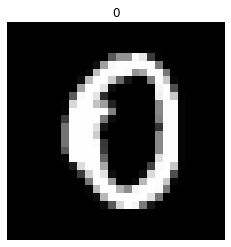

In [17]:
# visualize data

def vis(img, label):
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()

vis_idx = 0
vis(X_val[vis_idx].reshape(-1, 28), y_val[vis_idx])

In [18]:
print(X_train.shape)
print(X_val.shape)


# define neural net
model = NN()

# add some layers
# YOUR CODE HERE

model = train(model, X_train , y_train, minibatch_size=128, epoch=10,
           learning_rate=0.01, X_val=X_val, y_val=y_val)




(52500, 784)
(17500, 784)


  0%|          | 0/411 [00:00<?, ?it/s]/Users/b.lestsov/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
  1%|          | 3/411 [00:00<00:15, 26.78it/s]

Epoch 1


  9%|▉         | 36/411 [00:00<00:02, 162.79it/s]

Loss = inf | Training Accuracy = 0.11249523809523809 | Val Loss = 21670283.138598908 | Val Accuracy = 0.11262857142857143
Epoch 2


  3%|▎         | 14/411 [00:00<00:02, 139.39it/s]

Loss = 20841446.786487646 | Training Accuracy = 0.11249523809523809 | Val Loss = 19994716.709891647 | Val Accuracy = 0.11262857142857143
Epoch 3


  4%|▍         | 16/411 [00:00<00:02, 155.37it/s]

Loss = 19229966.760607384 | Training Accuracy = 0.11249523809523809 | Val Loss = 18448706.647989746 | Val Accuracy = 0.11262857142857143
Epoch 4


  4%|▎         | 15/411 [00:00<00:02, 144.55it/s]

Loss = 17743087.88104586 | Training Accuracy = 0.11249523809523809 | Val Loss = 17022235.53341483 | Val Accuracy = 0.11262857142857143
Epoch 5


  4%|▎         | 15/411 [00:00<00:02, 143.64it/s]

Loss = 16371175.870360905 | Training Accuracy = 0.11249523809523809 | Val Loss = 15706060.502697004 | Val Accuracy = 0.11262857142857143
Epoch 6


  3%|▎         | 12/411 [00:00<00:03, 119.65it/s]

Loss = 15105341.382472698 | Training Accuracy = 0.11249523809523809 | Val Loss = 14491653.35923308 | Val Accuracy = 0.11262857142857143
Epoch 7


  2%|▏         | 9/411 [00:00<00:04, 84.16it/s]

Loss = 13937382.403873757 | Training Accuracy = 0.11249523809523809 | Val Loss = 13371145.314575667 | Val Accuracy = 0.11262857142857143
Epoch 8


  8%|▊         | 34/411 [00:00<00:02, 158.74it/s]

Loss = 12859731.108430127 | Training Accuracy = 0.11249523809523809 | Val Loss = 12337276.00237727 | Val Accuracy = 0.11262857142857143
Epoch 9


  4%|▎         | 15/411 [00:00<00:02, 146.09it/s]

Loss = 11865404.821419317 | Training Accuracy = 0.11249523809523809 | Val Loss = 11383346.434622744 | Val Accuracy = 0.11262857142857143
Epoch 10


100%|██████████| 137/137 [00:00<00:00, 402.62it/s]


Loss = 10947960.775074286 | Training Accuracy = 0.11249523809523809 | Val Loss = 10503175.595330233 | Val Accuracy = 0.11262857142857143


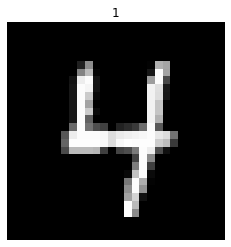

In [19]:
# visualize prediction 

vis_idx = 1
pred = model.predict(X_val[vis_idx])
vis(X_val[vis_idx].reshape(-1, 28), pred[0])

# TODO:
1) Add computational graph instead of list, model saving/loading, more optimizers, shedulers loss functions, operations, gpu support, utility tools ...

... Or simply use Pytorch/TF/whatever